<a href="https://colab.research.google.com/github/biby94/2020_cphys2/blob/master/hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. MNIST Digits

In [122]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [123]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255
X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [124]:
net.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [125]:
net.fit(X_train, y_train, epochs=1, batch_size=128)

469/469 [==============================] - 12s 25ms/step - loss: 0.2114 - acc: 0.9360


In [126]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1029 - acc: 0.9687


In [127]:
X_train.shape

(60000, 784)

In [128]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
val = net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
391/391 [==============================] - 10s 26ms/step - loss: 0.0755 - acc: 0.9763 - val_loss: 0.1060 - val_acc: 0.9664
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 0.0492 - acc: 0.9845 - val_loss: 0.0664 - val_acc: 0.9798
Epoch 3/10
391/391 [==============================] - 10s 26ms/step - loss: 0.0374 - acc: 0.9879 - val_loss: 0.0711 - val_acc: 0.9804
Epoch 4/10
391/391 [==============================] - 10s 27ms/step - loss: 0.0302 - acc: 0.9901 - val_loss: 0.0662 - val_acc: 0.9815
Epoch 5/10
391/391 [==============================] - 10s 27ms/step - loss: 0.0231 - acc: 0.9921 - val_loss: 0.0797 - val_acc: 0.9802
Epoch 6/10
391/391 [==============================] - 10s 26ms/step - loss: 0.0236 - acc: 0.9925 - val_loss: 0.0877 - val_acc: 0.9779
Epoch 7/10
391/391 [==============================] - 10s 26ms/step - loss: 0.0196 - acc: 0.9934 - val_loss: 0.0756 - val_acc: 0.9814
Epoch 8/10
391/391 [==============================] - 10s 26ms

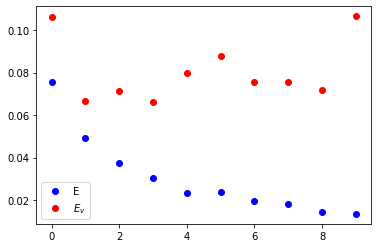

In [129]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

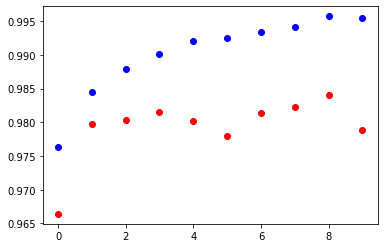

In [130]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [131]:
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 

model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

val2= model.fit(partial_X_train,partial_y_train,epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
391/391 [==============================] - 8s 21ms/step - loss: 0.3789 - acc: 0.8832 - val_loss: 0.1461 - val_acc: 0.9558
Epoch 2/10
391/391 [==============================] - 8s 21ms/step - loss: 0.1703 - acc: 0.9477 - val_loss: 0.1113 - val_acc: 0.9657
Epoch 3/10
391/391 [==============================] - 8s 20ms/step - loss: 0.1283 - acc: 0.9606 - val_loss: 0.0921 - val_acc: 0.9725
Epoch 4/10
391/391 [==============================] - 8s 20ms/step - loss: 0.1100 - acc: 0.9659 - val_loss: 0.0804 - val_acc: 0.9753
Epoch 5/10
391/391 [==============================] - 8s 20ms/step - loss: 0.0969 - acc: 0.9683 - val_loss: 0.0843 - val_acc: 0.9764
Epoch 6/10
391/391 [==============================] - 8s 20ms/step - loss: 0.0860 - acc: 0.9734 - val_loss: 0.0742 - val_acc: 0.9785
Epoch 7/10
391/391 [==============================] - 8s 21ms/step - loss: 0.0800 - acc: 0.9747 - val_loss: 0.0767 - val_acc: 0.9781
Epoch 8/10
391/391 [==============================] - 8s 20ms/step - 

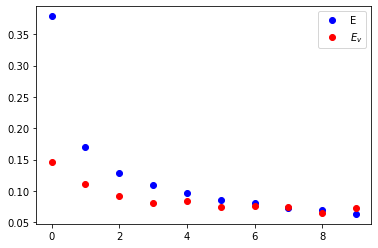

In [132]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')

plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

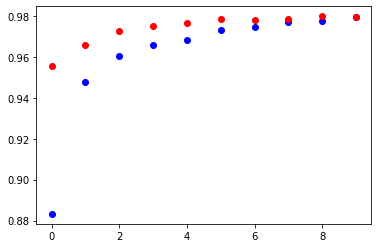

In [133]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']

plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [134]:
test_loss, test_acc = net.evaluate(X_test,y_test)
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - acc: 0.9809


2. Fashin MNIST

In [242]:
from keras.datasets import fashion_mnist
import tensorflow as tf

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [243]:
X.shape

(60000, 28, 28)

(9, <matplotlib.image.AxesImage at 0x7ff9cbe7ca90>)

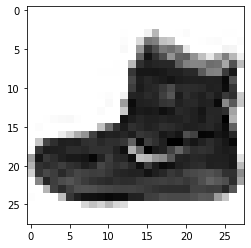

In [244]:
y[0], plt.imshow(X[0],cmap=plt.cm.binary) # Ankle boot

(0, <matplotlib.image.AxesImage at 0x7ff9cbcf5630>)

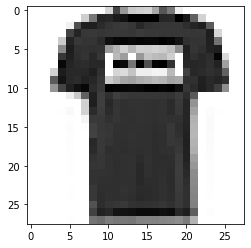

In [245]:
y[1], plt.imshow(X[1],cmap=plt.cm.binary) # T-shirt

In [246]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [247]:
class_names = ['T-shirtt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

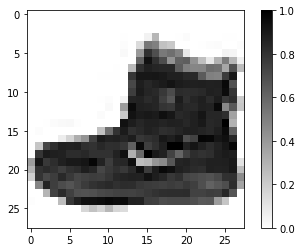

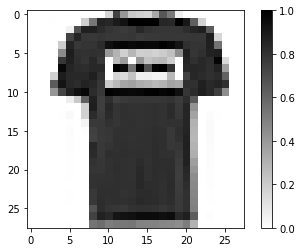

In [248]:
plt.figure()
y[0], plt.imshow(X[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
y[1], plt.imshow(X[1],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [257]:
train_images = train_images / 255.0
test_images = test_images / 255.0

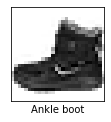

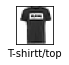

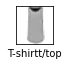

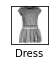

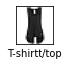

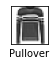

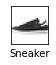

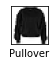

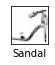

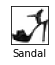

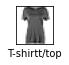

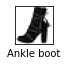

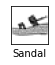

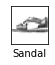

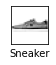

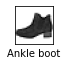

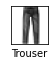

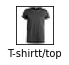

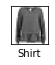

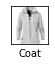

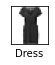

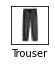

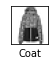

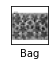

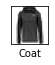

In [258]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [259]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

In [260]:
predictions = model.predict(test_images)
predictions[0]

array([0.11460207, 0.0394729 , 0.07012337, 0.09565862, 0.11121166,
       0.16675097, 0.07503606, 0.06472933, 0.19274639, 0.06966858],
      dtype=float32)

In [261]:
print(np.argmax(predictions[0]), class_names[np.argmax(predictions[0])])
print(test_labels[0], class_names[test_labels[0]])

8 Bag
9 Ankle boot


In [262]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(false)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label== true_label:
    color = 'blue'
  else:
      color = 'red'
      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]),
                 color=color)


In [263]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

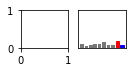

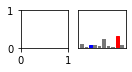

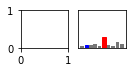

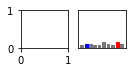

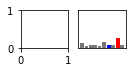

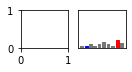

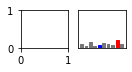

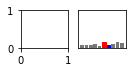

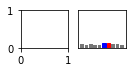

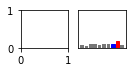

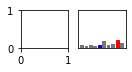

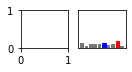

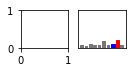

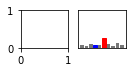

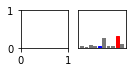

In [268]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  plt.show()

In [269]:
img = test_images[0]

In [270]:
img = (np.expand_dims(img,0))

In [271]:
predictions_single = model.predict(img)

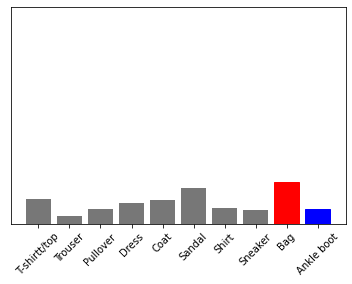

In [272]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [273]:
np.argmax(predictions_single[0])

8